In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

In [ ]:
combine_stocks = pd.read_csv('combine_stocks3.csv', index_col=['Date'], parse_dates=['Date'])
combine_stocks = combine_stocks.drop(columns=['Unnamed: 0'])
combine_stocks

,Tesla_Close,Tesla_Volume,Tesla_Open,Tesla_High,Tesla_Low,Lucid_Close,Lucid_Volume,Lucid_Open,Lucid_High,Lucid_Low
Date,,,,,,,,,,
2023-11-03,219.9600,119534800,221.1500,226.3701,218.4000,4.62,32179100.0,4.660,4.850,4.55
2023-11-02,218.5100,125987600,212.9700,219.2000,211.4500,4.54,47135750.0,4.130,4.615,4.12
2023-11-01,205.6600,121661700,204.0400,205.9900,197.8500,4.05,21911580.0,4.130,4.140,3.96
2023-10-31,200.8400,118068300,196.1200,202.8000,194.0700,4.12,20320210.0,4.065,4.175,4.04
2023-10-30,197.3600,136448200,209.2800,210.8800,194.6700,4.07,18462870.0,4.100,4.140,4.00
...,...,...,...,...,...,...,...,...,...,...
2013-11-11,9.6465,209467245,9.4000,9.6947,9.1400,NaN,NaN,NaN,NaN,NaN
2013-11-08,9.1967,336691932,9.0987,9.3733,8.8213,NaN,NaN,NaN,NaN,NaN
2013-11-07,9.3181,332808134,9.6127,9.7100,9.1747,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop na values
Tesla_Close = combine_stocks["Tesla_Close"].dropna()

# convert to string, make all 2 decimal places
Tesla_Close = Tesla_Close.apply(lambda x: '{:.2f}'.format(x))

# convert back to numeric
Tesla_Close = Tesla_Close.astype(float)
Tesla_Close

Date
2023-11-03    219.96
2023-11-02    218.51
2023-11-01    205.66
2023-10-31    200.84
2023-10-30    197.36
               ...  
2013-11-11      9.65
2013-11-08      9.20
2013-11-07      9.32
2013-11-06     10.08
2013-11-05     11.79
Name: Tesla_Close, Length: 2517, dtype: float64

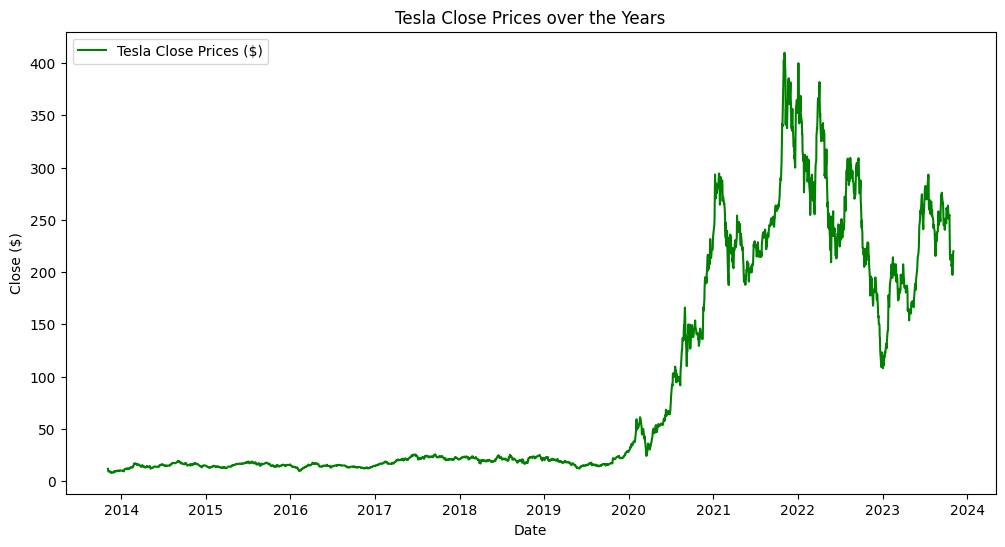

In [ ]:
# plot tesla stock prices over time (since they went public)
plt.figure(figsize=(12, 6))
plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [ ]:
# get deaths from tesla crashes data
tesla_deaths = pd.read_csv('CleanTesla_Deaths.csv')
tesla_deaths

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/Peds,TSLA+cycl / peds,Model,Autopilot claimed,Reported in NHTSA SGO
0,370.0,2023,10/14/2023,USA,WA,Car hit by oncoming Tesla,1,0,0,1,0,0,NaN,False,NaN
1,369.0,2023,10/14/2023,USA,CA,Stolen Tesla hits minivan,2,1,0,1,0,1,NaN,False,NaN
2,368.0,2023,10/13/2023,USA,CA,"Tesla hits divider and tree, ignites",2,1,1,0,0,2,NaN,False,NaN
3,367.0,2023,10/10/2023,USA,MA,Tesla hits car making u-turn,1,0,0,1,0,0,NaN,False,NaN
4,366.0,2023,10/4/2023,USA,CA,"Head-on collision, Tesla catches fire",1,1,0,0,0,1,Y,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,5.0,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,0,0,1,0,0,NaN,False,NaN
286,4.0,2014,7/4/2014,USA,CA,Thief crashes stolen Tesla,1,1,0,0,0,1,NaN,False,NaN
287,3.0,2014,7/4/2014,USA,CA,Tesla rear ends stopped car,3,0,0,3,0,0,NaN,False,NaN
288,2.0,2013,11/2/2013,USA,CA,Tesla kills cyclist,1,0,0,0,1,1,NaN,False,NaN


In [ ]:
# gather all the death dates we are going to highlight
tesla_deaths["Date"] = pd.to_datetime(tesla_deaths["Date"])
tesla_deaths["Date"]

0     2023-10-14
1     2023-10-14
2     2023-10-13
3     2023-10-10
4     2023-10-04
         ...    
285   2014-07-14
286   2014-07-04
287   2014-07-04
288   2013-11-02
289   2013-04-02
Name: Date, Length: 290, dtype: datetime64[ns]

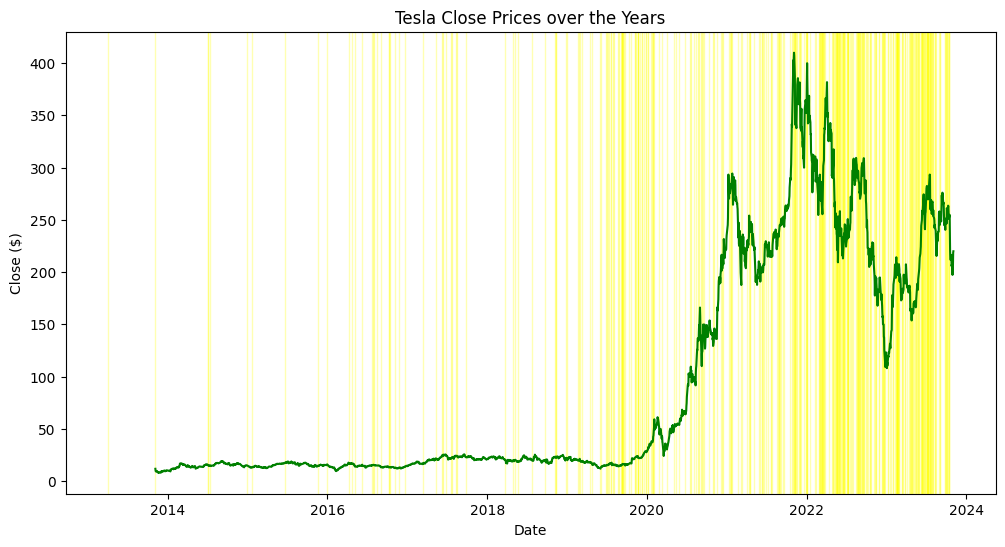

In [ ]:
# plot the stock prices over time but this time highlight the days where there were deaths
plt.figure(figsize=(12, 6))
plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Close ($)')

tesla_deaths = pd.read_csv('CleanTesla_Deaths.csv', parse_dates=["Date"])

for date in tesla_deaths['Date']:
    plt.axvspan(date, date + pd.DateOffset(days=1), color='yellow', alpha=0.3, label=f'Highlighted Day {date.date()}')

plt.show()

In [ ]:
mean_tesla_close = Tesla_Close.mean()
tesla_sd = Tesla_Close.std()
print(mean_tesla_close)
print(tesla_sd)

90.55756058800145
107.43993364731331


In [ ]:
ma_day = [10,50,200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        combine_stocks[column_name] = combine_stocks["Tesla_Close"].rolling(ma).mean()

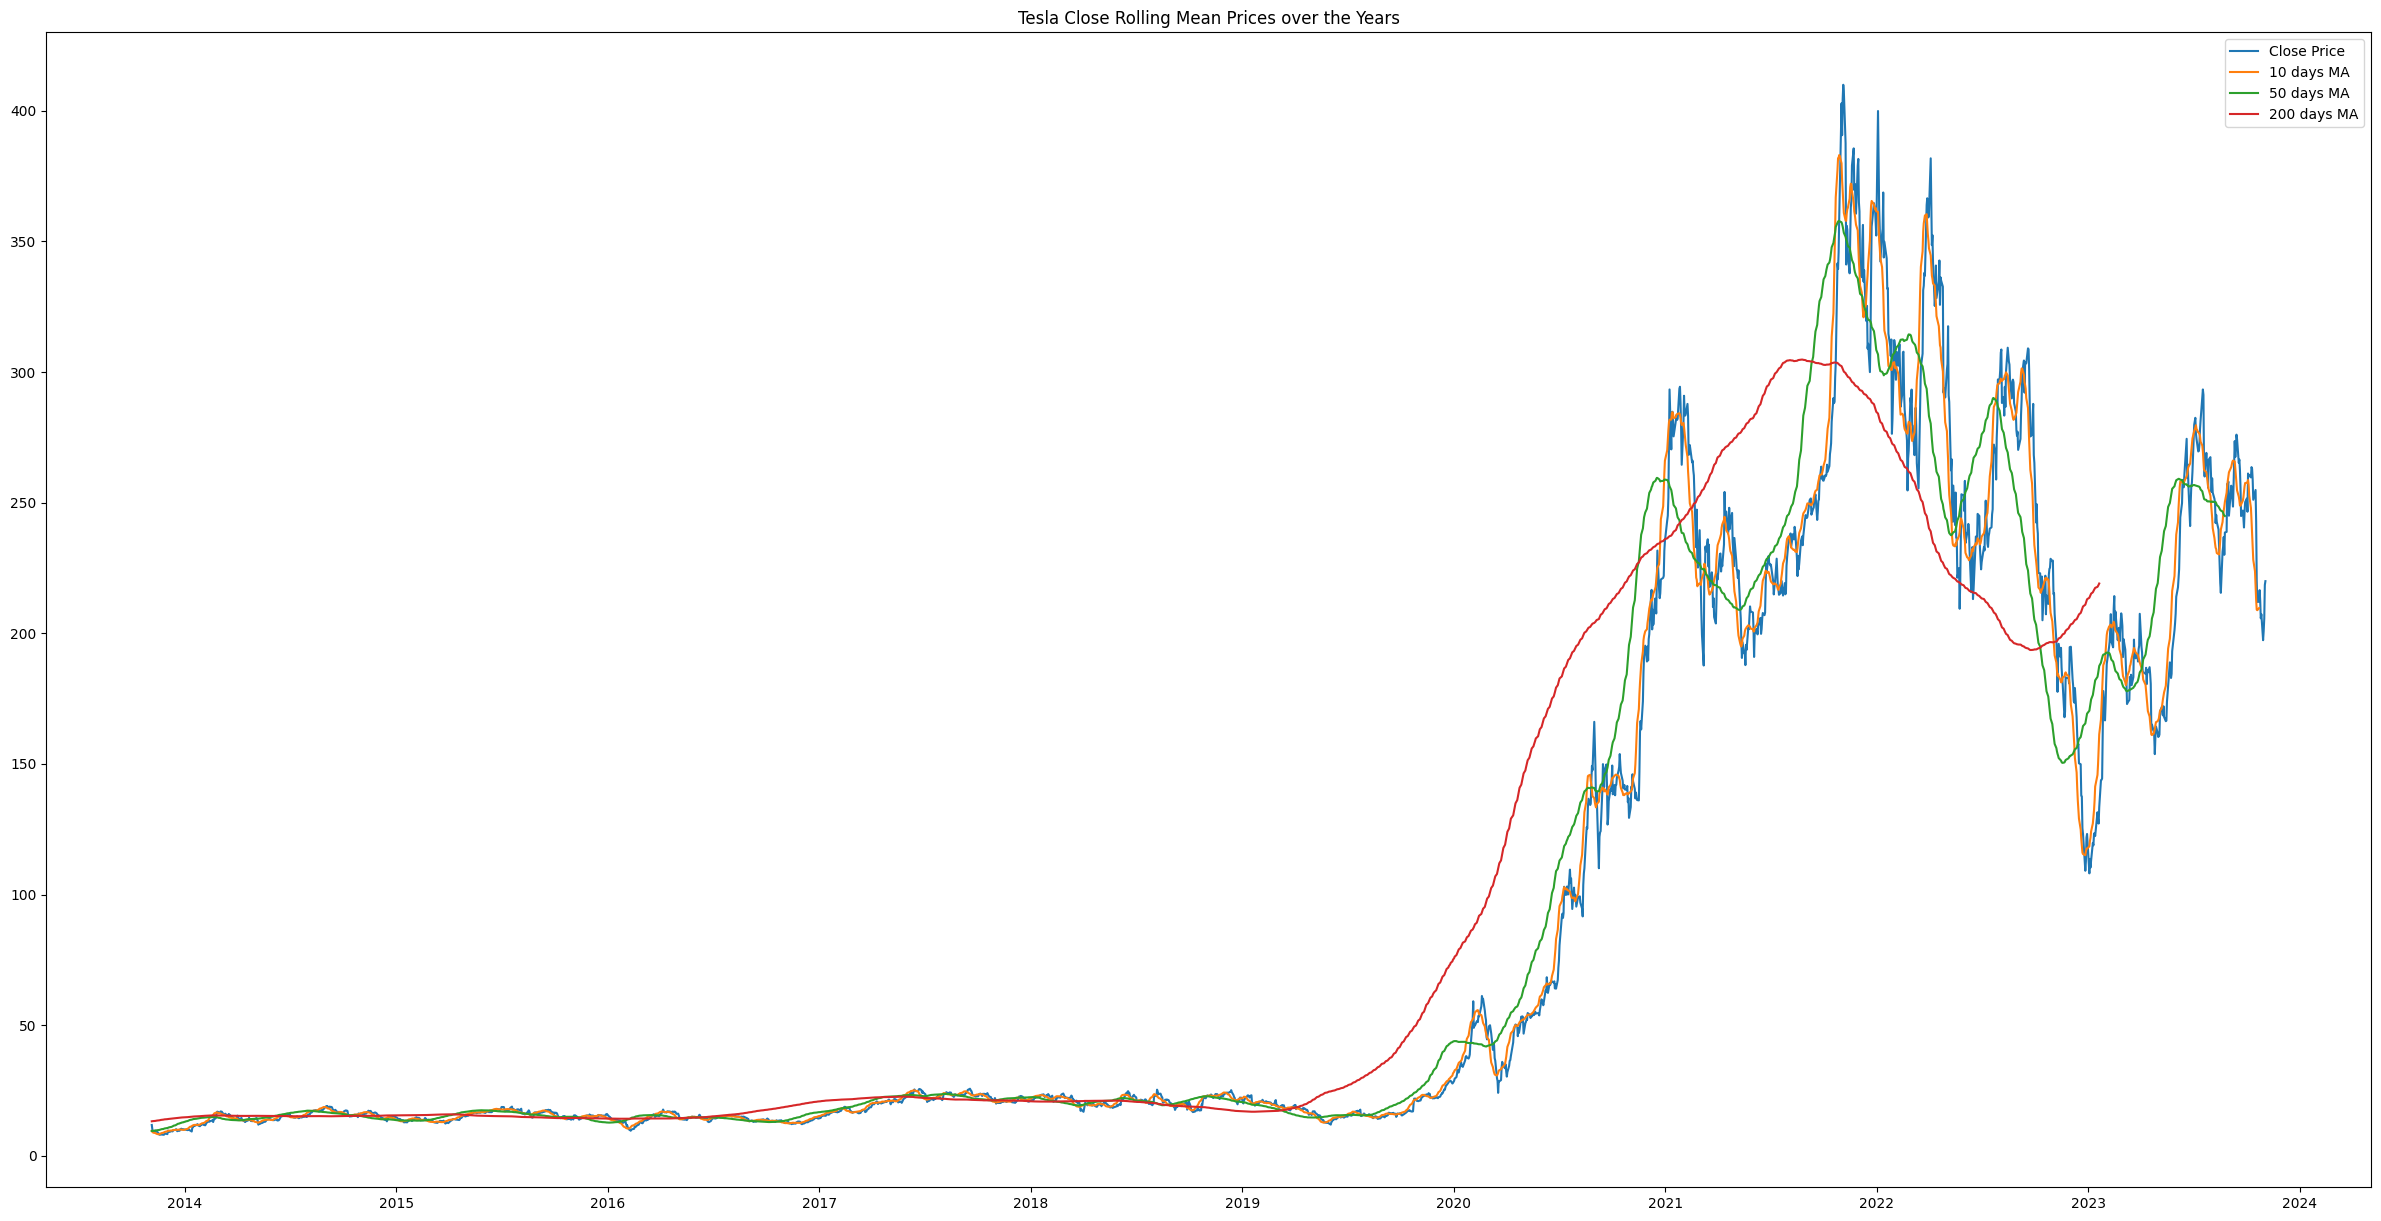

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(combine_stocks['Tesla_Close'],label='Close Price')
plt.plot(combine_stocks['MA for 10 days'],label='10 days MA')
plt.plot(combine_stocks['MA for 50 days'],label='50 days MA')
plt.plot(combine_stocks['MA for 200 days'],label='200 days MA')
plt.title('Tesla Close Rolling Mean Prices over the Years')
plt.legend()
plt.show()

In [ ]:
#pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/meganmckenzie/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warni

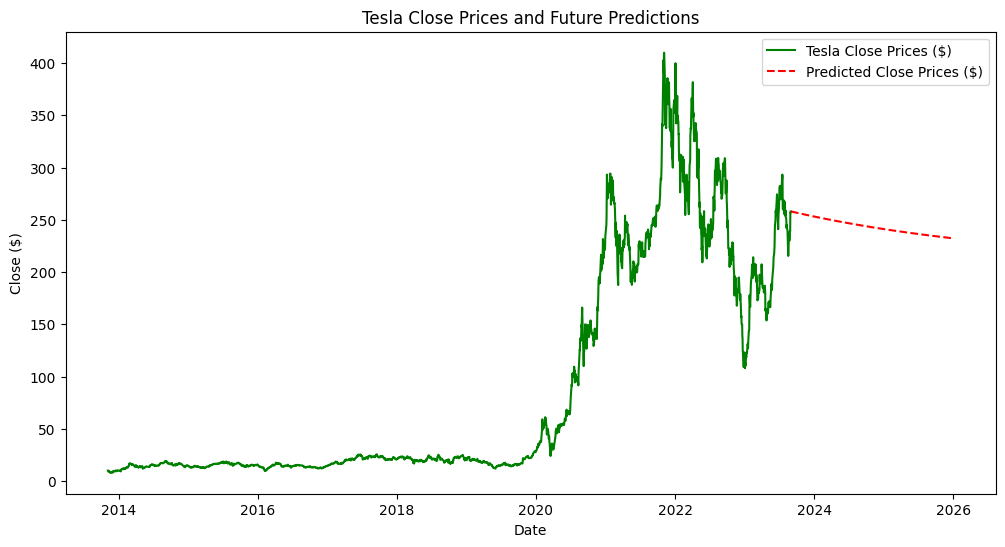

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch historical Tesla stock data
data = yf.download("TSLA", start="2013-11-05", end="2023-09-01")

# Feature engineering (example: using previous close prices as a feature)
data['Previous_Close'] = data['Close'].shift(1)

# Remove rows with missing data
data = data.dropna()

# Create a linear regression model (you should replace this with your trained model)
model = LinearRegression()
X_train = data[['Previous_Close']]
y_train = data['Close']
model.fit(X_train, y_train)


# Specify the end date you want to predict up to
end_date = pd.to_datetime("2026-01-01")

# Create a DataFrame with dates for the future prediction
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), end=end_date, freq='D')

# Create a DataFrame to store the predicted prices
predicted_data = pd.DataFrame(index=future_dates, columns=['Predicted_Close'])

# Initialize the first predicted price with the last known close price
last_known_price = data['Close'].iloc[-1]
predicted_data['Predicted_Close'] = last_known_price

# Predict future prices
for i in range(1, len(future_dates)):
    previous_close = predicted_data['Predicted_Close'].iloc[i - 1]
    predicted_price = model.predict(np.array([[previous_close]]))
    predicted_data['Predicted_Close'].iloc[i] = predicted_price[0]

# Concatenate the historical and predicted data
full_data = pd.concat([data, predicted_data])

# Create a plot for actual and predicted close prices
plt.figure(figsize=(12, 6))
plt.plot(full_data.index, full_data['Close'], label='Tesla Close Prices ($)', color='green')
plt.plot(full_data.index, full_data['Predicted_Close'], label='Predicted Close Prices ($)', color='red', linestyle='--')
plt.title('Tesla Close Prices and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()
